In [1]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
print(X)
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector
print(y)

[[0.74908024]
 [1.90142861]
 [1.46398788]
 [1.19731697]
 [0.31203728]
 [0.31198904]
 [0.11616722]
 [1.73235229]
 [1.20223002]
 [1.41614516]
 [0.04116899]
 [1.9398197 ]
 [1.66488528]
 [0.42467822]
 [0.36364993]
 [0.36680902]
 [0.60848449]
 [1.04951286]
 [0.86389004]
 [0.58245828]
 [1.22370579]
 [0.27898772]
 [0.5842893 ]
 [0.73272369]
 [0.91213997]
 [1.57035192]
 [0.39934756]
 [1.02846888]
 [1.18482914]
 [0.09290083]
 [1.2150897 ]
 [0.34104825]
 [0.13010319]
 [1.89777107]
 [1.93126407]
 [1.6167947 ]
 [0.60922754]
 [0.19534423]
 [1.36846605]
 [0.88030499]
 [0.24407647]
 [0.99035382]
 [0.06877704]
 [1.8186408 ]
 [0.51755996]
 [1.32504457]
 [0.62342215]
 [1.04013604]
 [1.09342056]
 [0.36970891]
 [1.93916926]
 [1.55026565]
 [1.87899788]
 [1.7896547 ]
 [1.19579996]
 [1.84374847]
 [0.176985  ]
 [0.39196572]
 [0.09045458]
 [0.65066066]
 [0.77735458]
 [0.54269806]
 [1.65747502]
 [0.71350665]
 [0.56186902]
 [1.08539217]
 [0.28184845]
 [1.60439396]
 [0.14910129]
 [1.97377387]
 [1.54448954]
 [0.39

In [2]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y   #using normal equation for theta.The @ operator performs matrix multiplication. 

In [3]:
X_new = np.array([[0], [2]])    #Generate test data
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
print(X_new_b)
y_predict = X_new_b @ theta_best   #make prediction
print(y_predict)

[[1. 0.]
 [1. 2.]]
[[4.21509616]
 [9.75532293]]


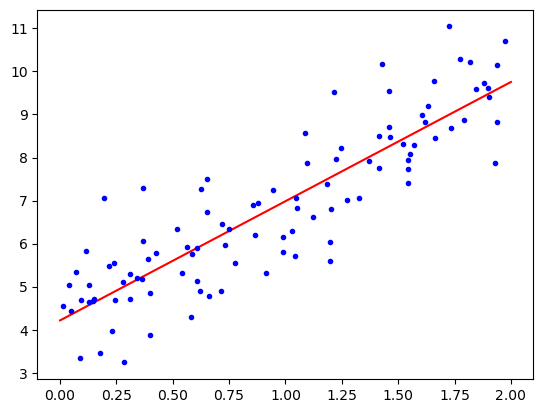

In [4]:
#plot predicted values
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-", label="Predictions")   #here, we are mainly looking at x=0 and 2 using X_new_b.
plt.plot(X, y, "b.")   #training sample.
[...]  # beautify the figure: add labels, axis, grid, and legend
plt.show()

In [5]:
#Run linear regression.
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)     #training step
lin_reg.intercept_, lin_reg.coef_   #separate intercept->theta_0 and other parameters (coef)
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [6]:
#Gradient descent step using equations 4.6 and 4.7 from textbook. They can be derived using the equations of theta and J discussed during lectures.

eta = 0.1  # learning rate, you can also run a grid search using different range of learning rates as discussed during lectures.
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):    #run different iterations over training set.
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients